In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
# Data Analysis and Visualization

In [9]:
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False


path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family = font_name)

In [2]:
dfins = pd.read_excel('unsortedgroup.xlsx').drop('Unnamed: 0', axis = 1)
dfnav = pd.read_excel('./Data/naver_reviews.xlsx')

In [3]:
dfnav.rename(columns = {'Unnamed: 0': '카페'}, inplace = True)

In [4]:
octob = dfins[dfins.month == 10]

In [5]:
octob = octob[(octob.cafe != '돌카롱') & (octob.cafe != '트라이브')]

In [12]:
like = octob.groupby('cafe').like.sum().to_frame()
cont = octob.groupby('cafe').content.count().to_frame()
df1 = pd.merge(like, cont, on = 'cafe', how = 'outer')
df1.reset_index(inplace = True)
df1['ratio'] = df1.like / df1.content

df1.head()

cafe   like  content       ratio
0  너와의첫여행   2335       30   77.833333
1   랜디스도넛  18915      237   79.810127
2  리치망고애월   1611       34   47.382353
3      봄날  29290      220  133.136364
4      새빌  29361      278  105.615108

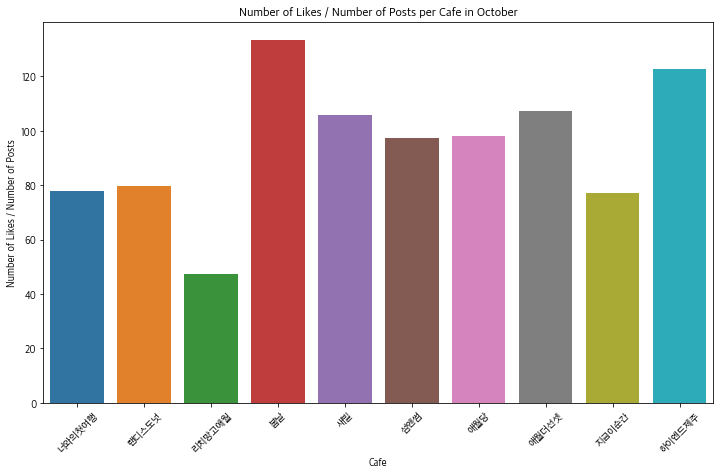

In [10]:
# Graph shows ratio between number of likes and the number of posts per café in October.

plt.figure(figsize = (12,7))
b = sns.barplot(x = 'cafe', y = 'ratio', data = df1)
plt.setp(b.get_xticklabels(), rotation = 45)
plt.xlabel('Cafe')
plt.ylabel('Number of Likes / Number of Posts')
plt.title('Number of Likes / Number of Posts per Cafe in October')
plt.show()
b.figure.savefig('./Analysis/octoberratio')

In [13]:
t = dfins[(dfins.cafe != '돌카롱') & (dfins.cafe != '트라이브')]
l1 = t.groupby('cafe').like.sum().to_frame()
c1 = t.groupby('cafe').content.count().to_frame()
df2 = pd.merge(l1, c1, on = 'cafe', how = 'outer')
df2.reset_index(inplace = True)
df2['ratio'] = df2.like / df2.content

df2.head()

cafe    like  content       ratio
0  너와의첫여행    5039       79   63.784810
1   랜디스도넛   73254      857   85.477246
2  리치망고애월    9101      180   50.561111
3      봄날  123106      996  123.600402
4      새빌   65382      707   92.478076

In [15]:
dfh = df2[df2.content > 500]
dfl = df2[df2.content < 500]

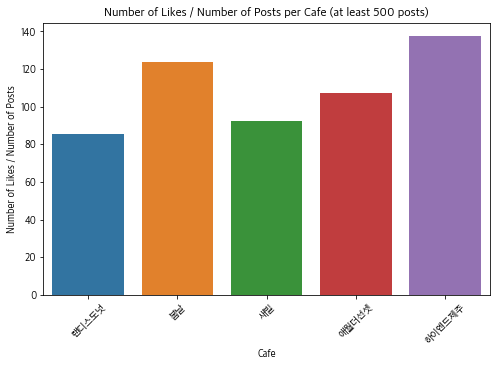

In [18]:
# Graph shows ratio between number of likes and number of posts of cafés with at least 500 posts.

plt.figure(figsize = (8,5))
b = sns.barplot(x = 'cafe', y = 'ratio', data = dfh)
plt.setp(b.get_xticklabels(), rotation = 45)
plt.xlabel('Cafe')
plt.ylabel('Number of Likes / Number of Posts')
plt.title('Number of Likes / Number of Posts per Cafe (at least 500 posts)')
plt.show()
b.figure.savefig('./Analysis/highratio.png')

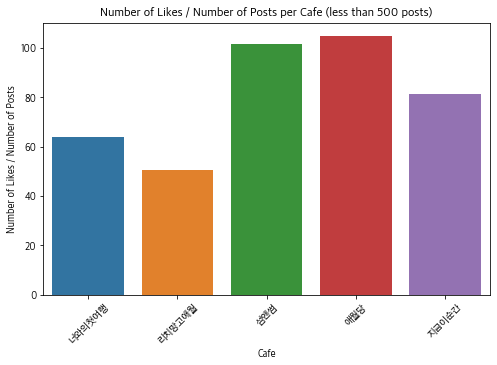

In [19]:
# Graph shows ratio between number of likes and number of posts of cafés with at most 500 posts.

plt.figure(figsize = (8,5))
b = sns.barplot(x = 'cafe', y = 'ratio', data = dfl)
plt.setp(b.get_xticklabels(), rotation = 45)
plt.xlabel('Cafe')
plt.ylabel('Number of Likes / Number of Posts')
plt.title('Number of Likes / Number of Posts per Cafe (less than 500 posts)')
plt.show()
b.figure.savefig('./Analysis/lowratio.png')

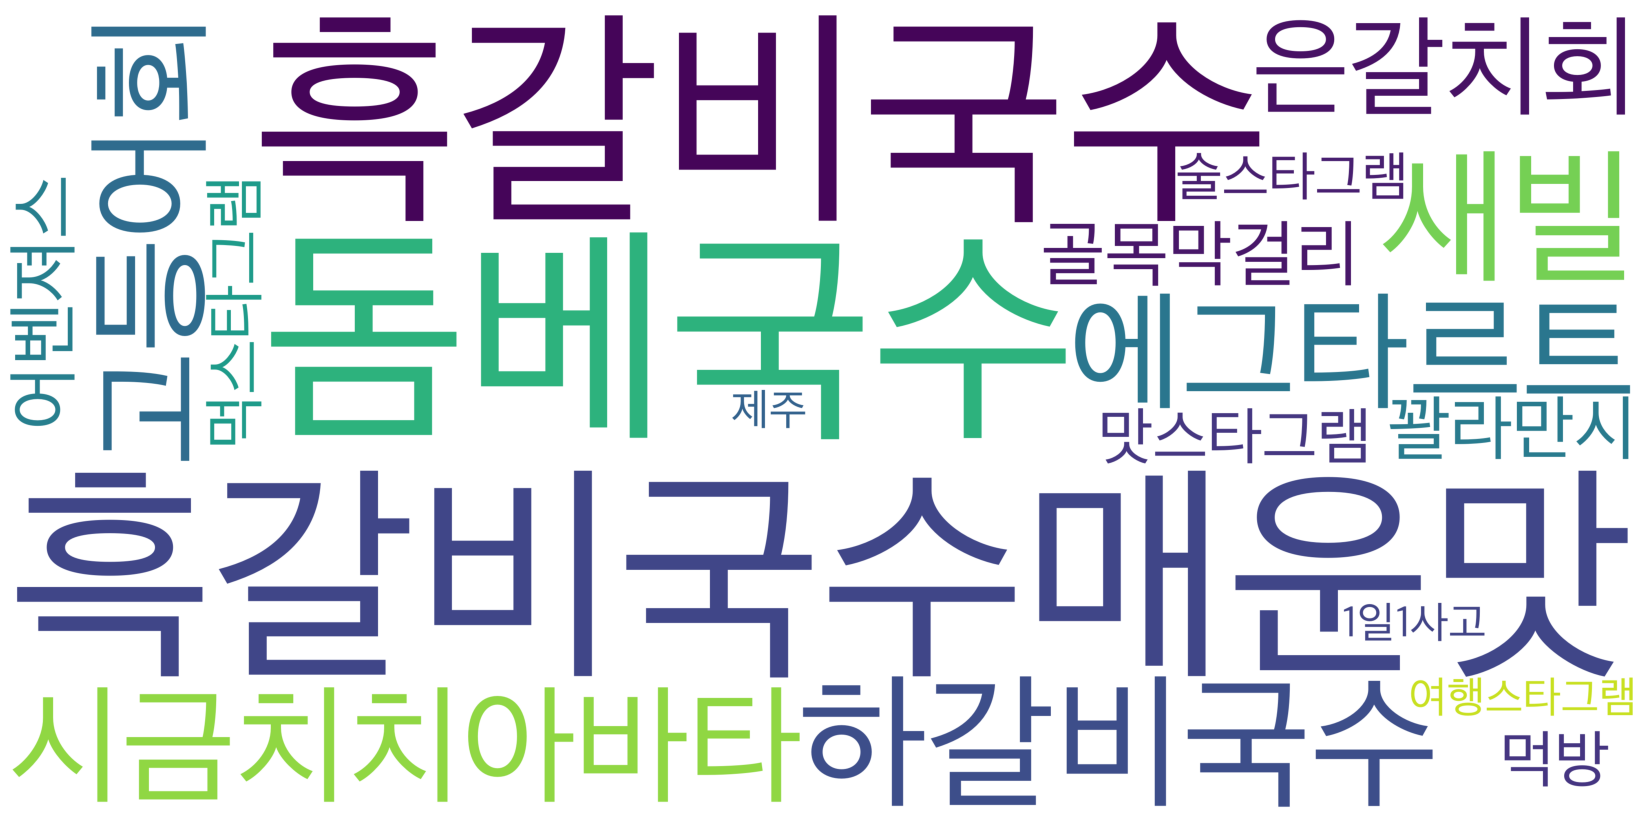

In [32]:
# Removing punctuation from text
text = dfins.tags[0].replace('#', '')[1:-1].replace("'", "").replace(',', '')

# Creating example wordcloud
stopwords = set(STOPWORDS)
word_draw = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    )
word_draw.generate(text)
plt.figure(figsize=(30,15))
plt.imshow(word_draw)
plt.axis('off')
plt.show()

In [22]:
# Applying for all tags

wc = dfins[(dfins.cafe != '돌카롱') & (dfins.cafe != '트라이브')]
wc.tags = wc.tags.apply(lambda x : x.replace('#', '')[1:-1].replace("'", "").replace(',', ''))
wc.head()

cafe                                            content       date  like  \
0   새빌  200629 모착친 제주여행 3일차(연청이 진청된 날)...#흑갈비국수매운맛 #흑갈... 2020-07-01    29   
1   새빌  #제주#제주도#jejuisland #새별오름#새빌카페#새빌#saebil#제주카페#우... 2020-07-02    56   
2   새빌  삼겹살 갈치조림 고말수제비 산채비빔밥&제육 #7본가 본점 #짱갈비 #덕승식당#새빌 ... 2020-07-02     8   
3   새빌  _#휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도 👌.이런 #매력쟁이 😍....... 2020-07-02    44   
4   새빌   행복한 첫날이었다☘️...#제주도 #오설록 #새별오름 #새빌 #이호테우해변 #구구즈여행 2020-07-02    94   

     place                                               tags  month  \
0      NaN  흑갈비국수매운맛 흑갈비국수 돔베국수 하갈비국수 새빌 시금치치아바타 에그타르트 고등어...      7   
1  Cafè 새빌  제주 제주도 jejuisland 새별오름 새빌카페 새빌 saebil 제주카페 우도땅...      7   
2      NaN                               7본가 짱갈비 덕승식당 새빌 참솔식당      7   
3  애월읍 봉성리        휘뚜루마뚜루데일리룩으로도비치룩으로도바지에도치마에도 매력쟁이 봉성리봄 봄썸부티크      7   
4      NaN                       제주도 오설록 새별오름 새빌 이호테우해변 구구즈여행      7   

     weekday  weekno  
0  Wednesday      27  
1   Thursday      27  
2   Thursday      27  
3   Thursday      27  
4   Thursday      27

In [25]:
# Extracting café and tags only

w = wc.groupby(['cafe', 'tags']).content.count().to_frame()
w.reset_index(inplace = True)
w.drop('content', axis = 1, inplace = True)
w.head()

cafe                                               tags
0  너와의첫여행                                                   
1  너와의첫여행                                          130사이즈우리집
2  너와의첫여행  6살 68개월 연하남친 우빈이랑지원이랑 엄마와아들 모자사이 가을제주 제주도 귤밭 제...
3  너와의첫여행  6살 69개월 아들 아들스타그램 연상여친 아들일상 가을제주 제주 제주도 제주여행 너...
4  너와의첫여행                                  jeju 너와의첫여행카페 청귤밭

In [26]:
w.cafe.unique()

array(['너와의첫여행', '랜디스도넛', '리치망고애월', '봄날', '새빌', '섬앤썸', '애월당', '애월더선셋',
       '지금이순간', '하이엔드제주'], dtype=object)

In [27]:
# Separating data by café

fv = w[w.cafe == '너와의첫여행']
rd = w[w.cafe == '랜디스도넛']
rm = w[w.cafe == '리치망고애월']
bn = w[w.cafe == '봄날']
sb = w[w.cafe == '새빌']
ss = w[w.cafe == '섬앤썸']
ad = w[w.cafe == '애월당']
aw = w[w.cafe == '애월더선셋']
rn = w[w.cafe == '지금이순간']
he = w[w.cafe == '하이엔드제주']

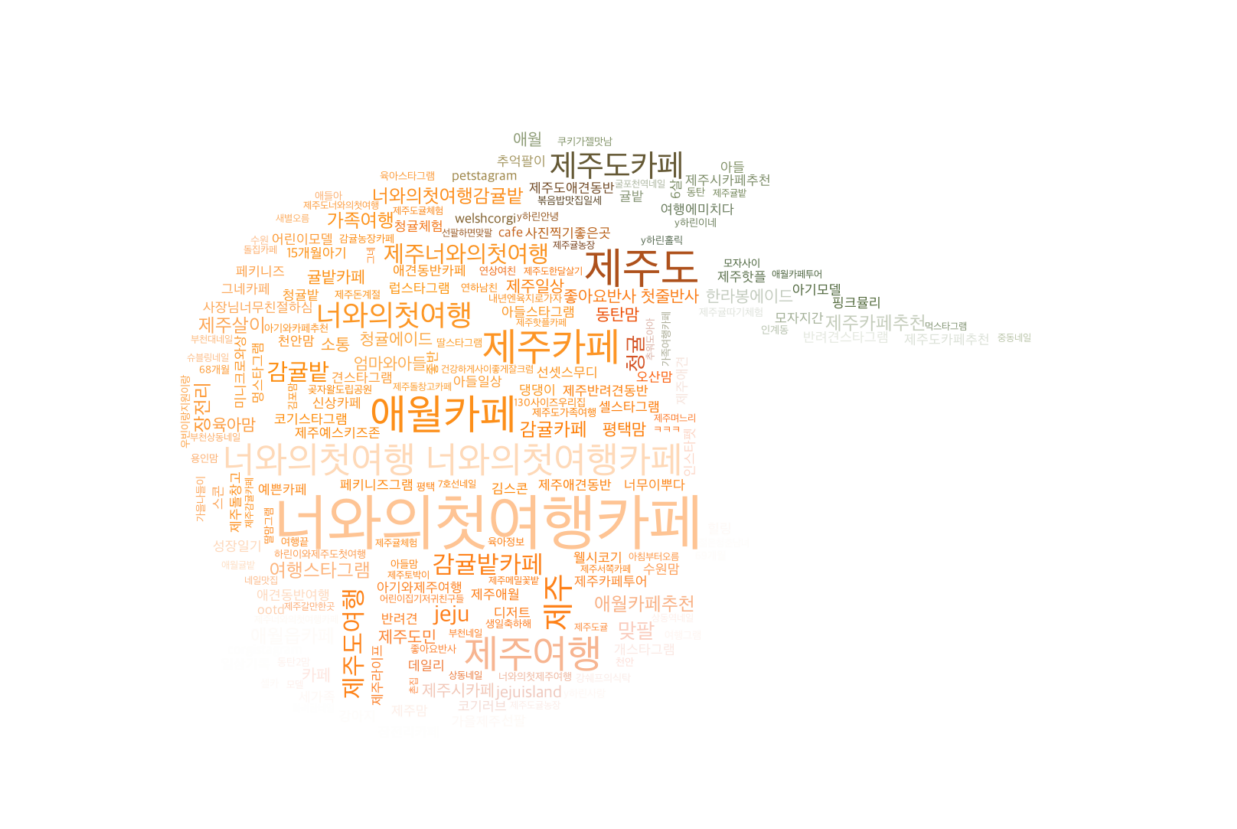

In [89]:
# Masking wordclouds with chosen images

firvac = " ".join(tag for tag in fv.tags)
mask = np.array(Image.open('./images/clementine.jpg'))
stopwords = set(STOPWORDS)
wcfv = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',  # windows는 폰트 path 다름
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(firvac)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (30,15))
plt.imshow(wcfv.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/나와의첫여행귤wc.jpg")
plt.show()

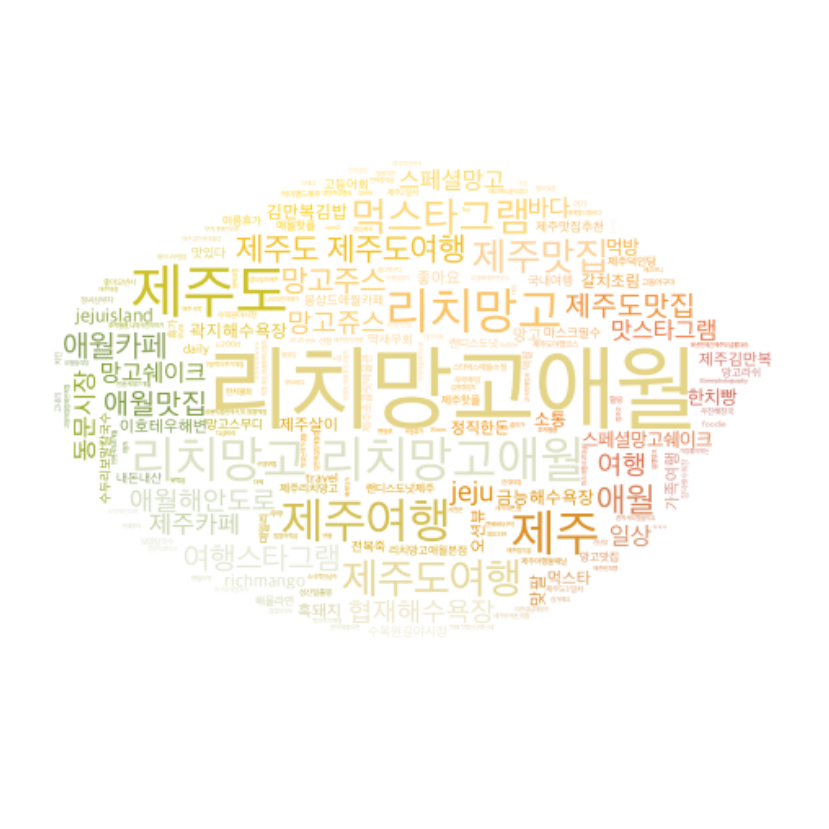

In [98]:
richman = " ".join(tag for tag in rm.tags)
mask = np.array(Image.open('./images/mango.png'))
stopwords = set(STOPWORDS)
wcrm = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(richman)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcrm.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/리치망고애월망고wc.jpg")
plt.show()

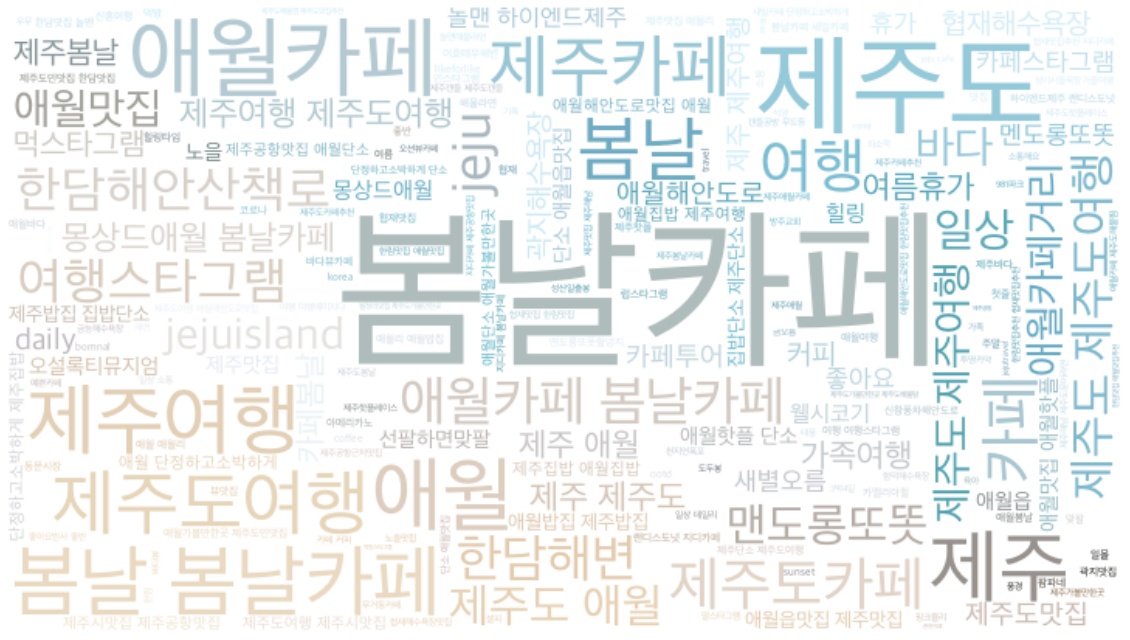

In [99]:
bomnal = " ".join(tag for tag in bn.tags)
mask = np.array(Image.open('./images/view.png'))
stopwords = set(STOPWORDS)
wcbn = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(bomnal)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcbn.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/봄날뷰wc.jpg")
plt.show()

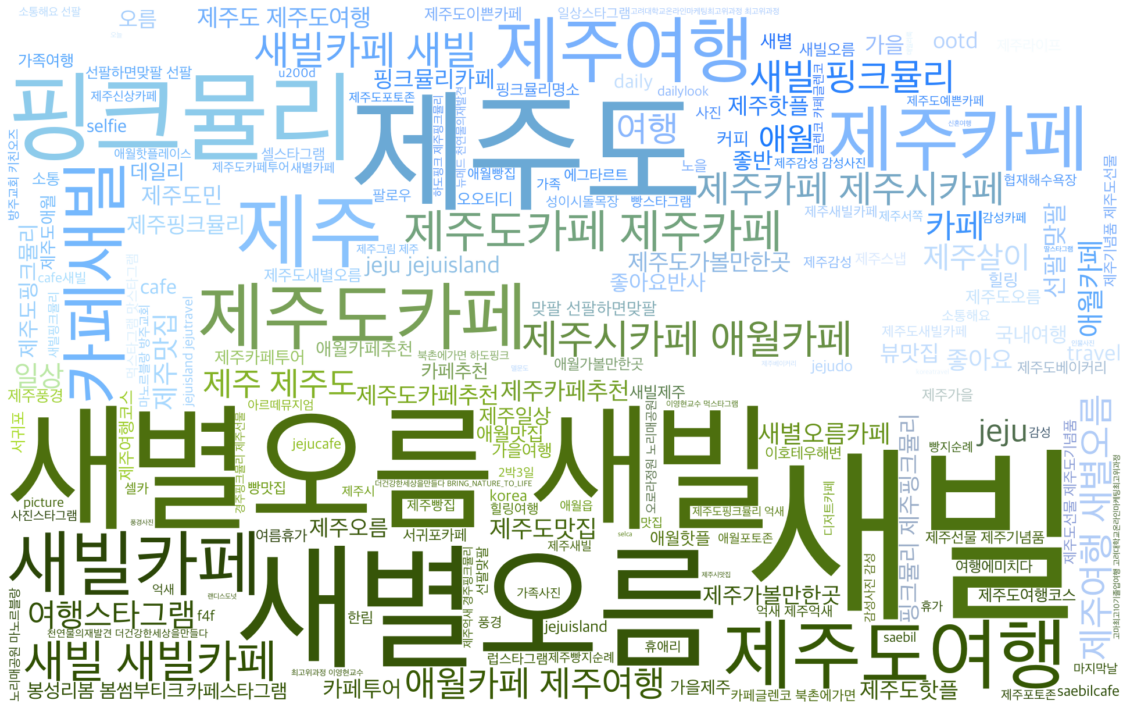

In [100]:
saebil = " ".join(tag for tag in sb.tags)
mask = np.array(Image.open('./images/xp.jpg'))
stopwords = set(STOPWORDS)
wcsb = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(saebil)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcsb.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/새빌마이크로소프트wc.jpg")
plt.show()

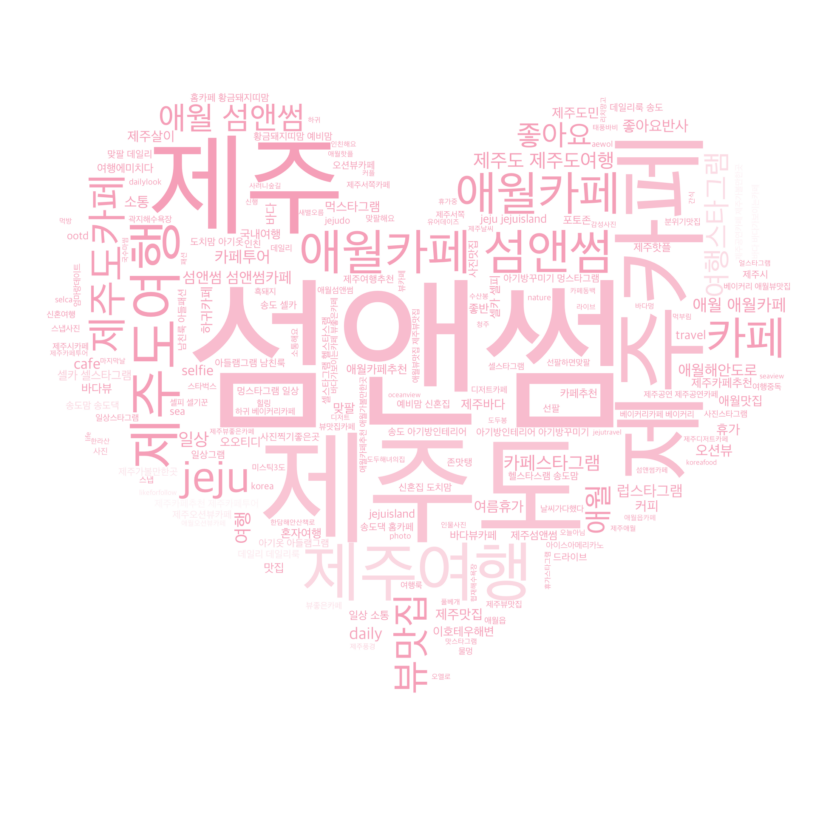

In [106]:
somensome = " ".join(tag for tag in ss.tags)
mask = np.array(Image.open('./images/heart.jpg'))
stopwords = set(STOPWORDS)
wcss = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(somensome)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcss.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/섬앤썸뷰wc.jpg")
plt.show()

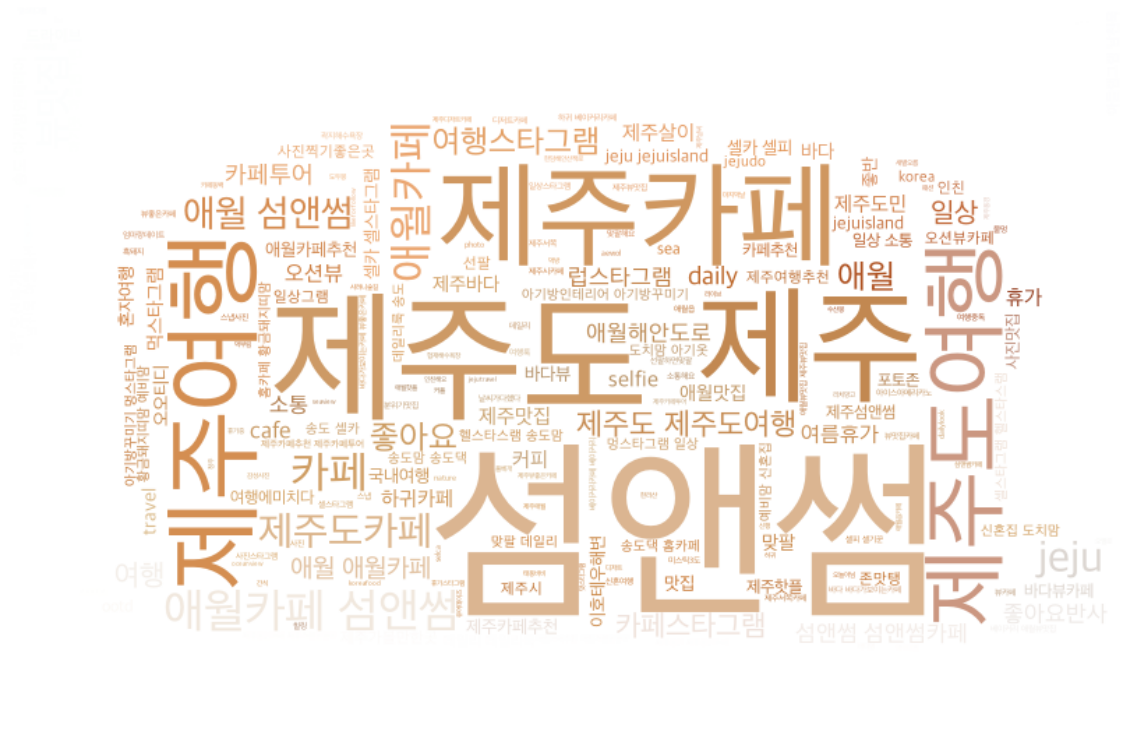

In [107]:
aewol = " ".join(tag for tag in ad.tags)
mask = np.array(Image.open('./images/bread.jpg'))
stopwords = set(STOPWORDS)
wcad = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(somensome)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcad.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/애월당빵wc.jpg")
plt.show()

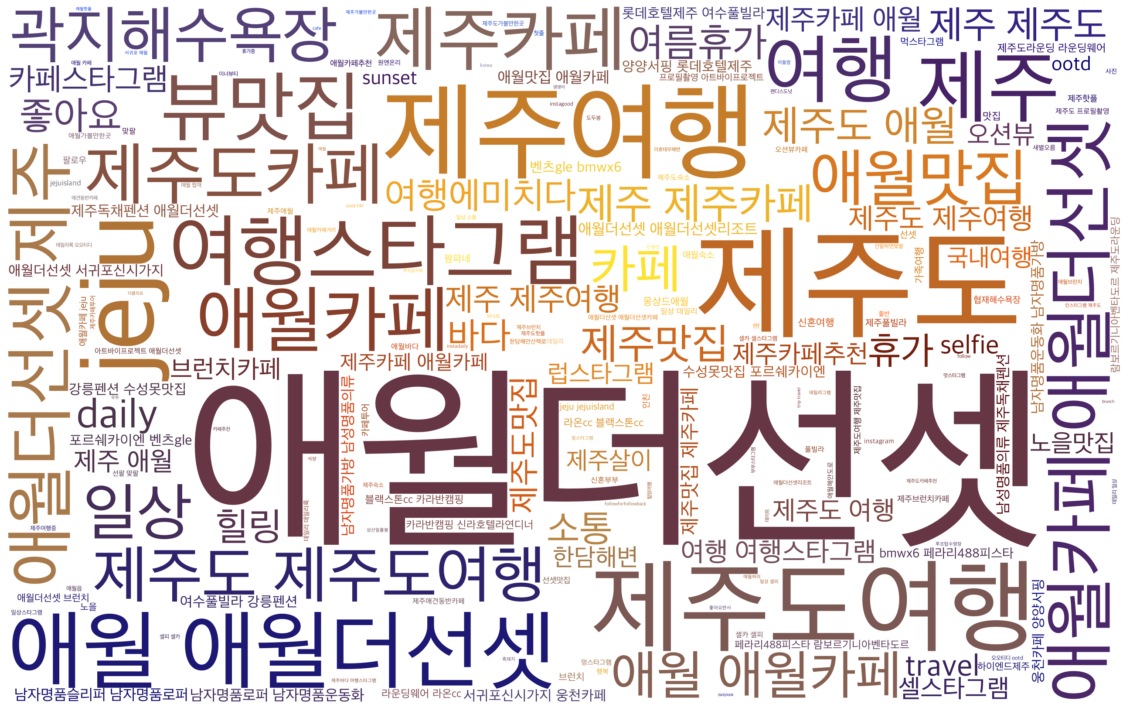

In [108]:
sunset = " ".join(tag for tag in aw.tags)
mask = np.array(Image.open('./images/sunset.jpg'))
stopwords = set(STOPWORDS)
wcaw = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(sunset)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcaw.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/애월더선셋일몰wc.jpg")
plt.show()

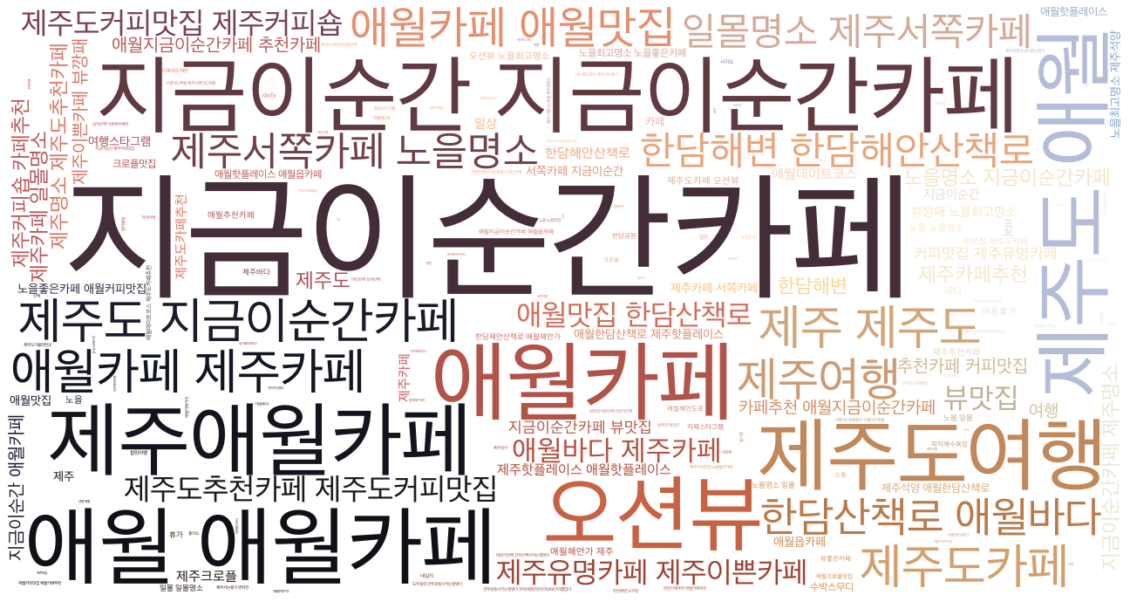

In [109]:
rightn = " ".join(tag for tag in rn.tags)
mask = np.array(Image.open('./images/dusk.jpg'))
stopwords = set(STOPWORDS)
wcrn = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(rightn)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wcrn.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/지금이순간노을wc.jpg")
plt.show()

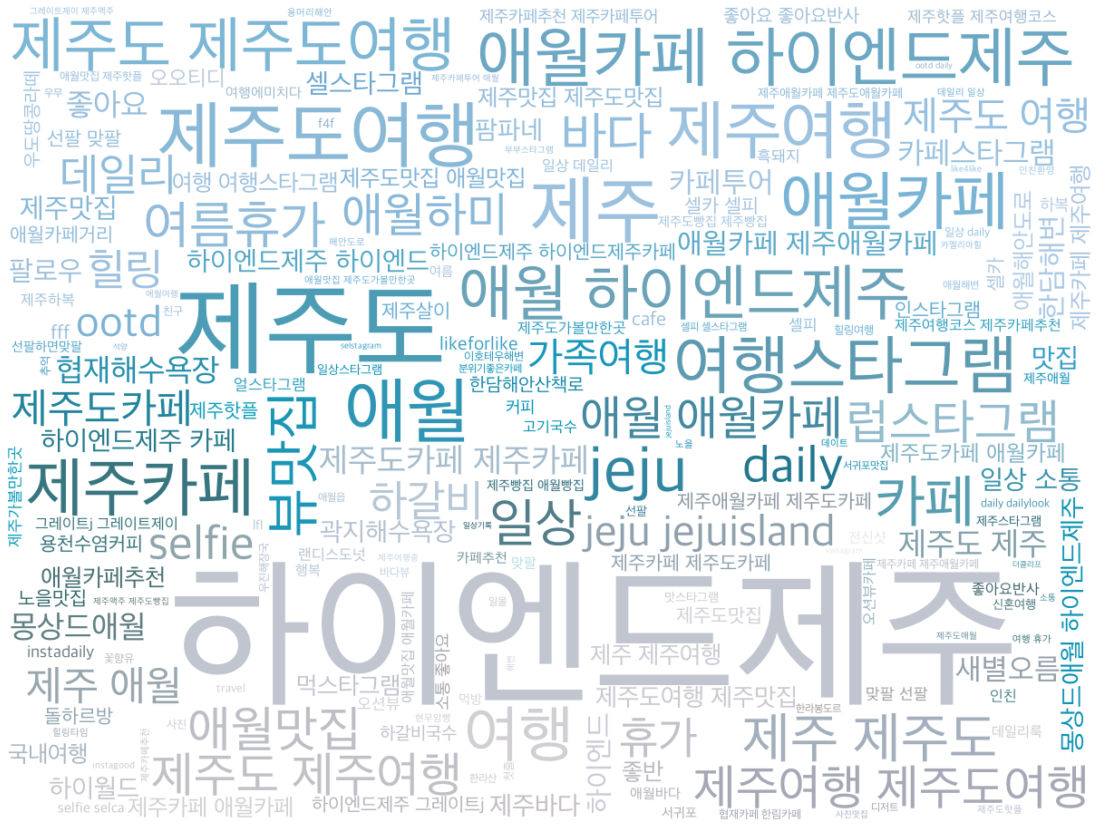

In [110]:
highend = " ".join(tag for tag in he.tags)
mask = np.array(Image.open('./images/highend.jpg'))
stopwords = set(STOPWORDS)
wche = WordCloud(
    stopwords = stopwords,
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc',
    width = 4000,
    height = 2000,
    background_color = 'white',
    mode = 'RGBA',
    mask = mask
    ).generate(highend)

image_colors = ImageColorGenerator(mask)
plt.figure(figsize = (20,15))
plt.imshow(wche.recolor(color_func = image_colors), interpolation = 'bilinear')
plt.axis('off')
plt.savefig("./wordclouds/하이엔드제주뷰wc.jpg")
plt.show()